## Linear Regression, Supervised Machine Learning

## Checking the data

In [8]:
import pandas as pd

# Load the data from the provided file path
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Original Data/GHG_Emissions_World_Sector_Country.xlsx'
data_df = pd.read_excel(file_path)

# Display the first few rows and column names of the dataframe
print(data_df.head())
print(data_df.columns)
print(data_df.dtypes)


   GHG       Sector EDGAR Country Code      Country      1970      1971  \
0  CO2  Agriculture                AFG  Afghanistan  0.029229  0.029229   
1  CO2  Agriculture                ALB      Albania  0.113300  0.113300   
2  CO2  Agriculture                ARG    Argentina  0.104343  0.104343   
3  CO2  Agriculture                ARM      Armenia  0.055288  0.055288   
4  CO2  Agriculture                AUS    Australia  0.311143  0.311143   

       1972      1973      1974      1975  ...      2013      2014      2015  \
0  0.029229  0.029229  0.039967  0.045310  ...  0.055157  0.084490  0.116967   
1  0.113300  0.113300  0.113614  0.112514  ...  0.032738  0.056624  0.058719   
2  0.104343  0.104343  0.087214  0.077314  ...  0.999167  1.145152  0.892257   
3  0.055288  0.055288  0.059966  0.059966  ...  0.021686  0.022629  0.022629   
4  0.311143  0.311143  0.311143  0.268190  ...  2.128866  2.182924  2.291771   

       2016      2017      2018      2019      2020      2021      2

## Hypothesis: Global GHG emissions have increased significantly since 1970.
Type of Analysis: Trend analysis.
Variables Used: Year, Total Emissions.

## Linear Regression

Explanation:

1. Load the Data: Load the data from the Excel file and display the first few rows, column names, and data types to understand the structure.
2. Check for Missing Values: Check for and drop any rows with missing values.
3. Sum Emissions: Calculate the total emissions for each year by summing the values of the respective year columns.
4. Visualize the Data: Create a scatterplot of total emissions over the years to visualize the trend. Rotate the x-axis labels vertically to avoid overlapping and save the scatterplot as an image.
5. Prepare for Regression: Reshape the years into an independent variable (X) and the total emissions into a dependent variable (y).
6. Split the Data: Split the data into training and test sets.
7. Run Regression: Fit the model to the training set and create predictions for the test set.
8. Sort Data for Plotting: Ensure X_test is sorted for plotting purposes.
9. Plot Regression Line: Plot the regression line on the sorted test set to visualize the model's fit. Rotate the x-axis labels vertically to avoid overlapping and save the regression line plot as an image.
9. Evaluate Model: Calculate and print the Mean Squared Error (MSE) and R-squared value to evaluate the model's performance.

   GHG       Sector EDGAR Country Code      Country      1970      1971  \
0  CO2  Agriculture                AFG  Afghanistan  0.029229  0.029229   
1  CO2  Agriculture                ALB      Albania  0.113300  0.113300   
2  CO2  Agriculture                ARG    Argentina  0.104343  0.104343   
3  CO2  Agriculture                ARM      Armenia  0.055288  0.055288   
4  CO2  Agriculture                AUS    Australia  0.311143  0.311143   

       1972      1973      1974      1975  ...      2013      2014      2015  \
0  0.029229  0.029229  0.039967  0.045310  ...  0.055157  0.084490  0.116967   
1  0.113300  0.113300  0.113614  0.112514  ...  0.032738  0.056624  0.058719   
2  0.104343  0.104343  0.087214  0.077314  ...  0.999167  1.145152  0.892257   
3  0.055288  0.055288  0.059966  0.059966  ...  0.021686  0.022629  0.022629   
4  0.311143  0.311143  0.311143  0.268190  ...  2.128866  2.182924  2.291771   

       2016      2017      2018      2019      2020      2021      2

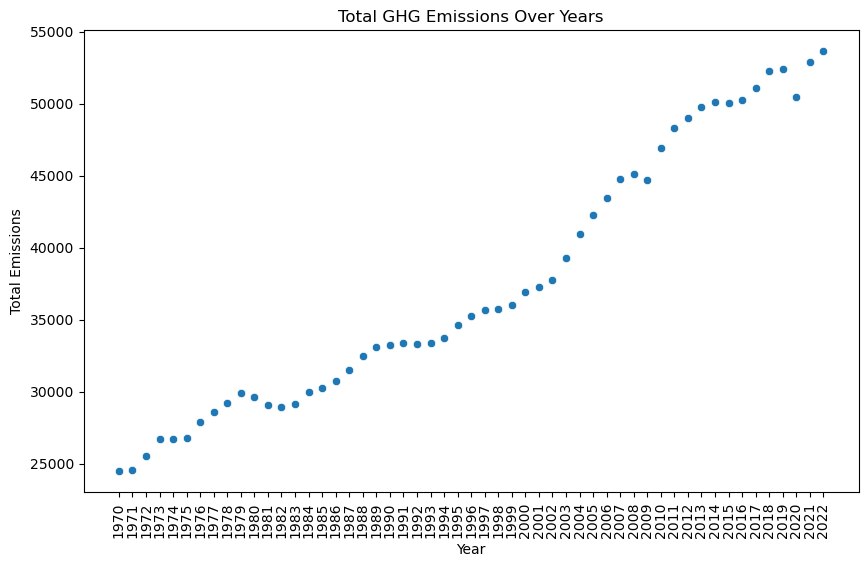

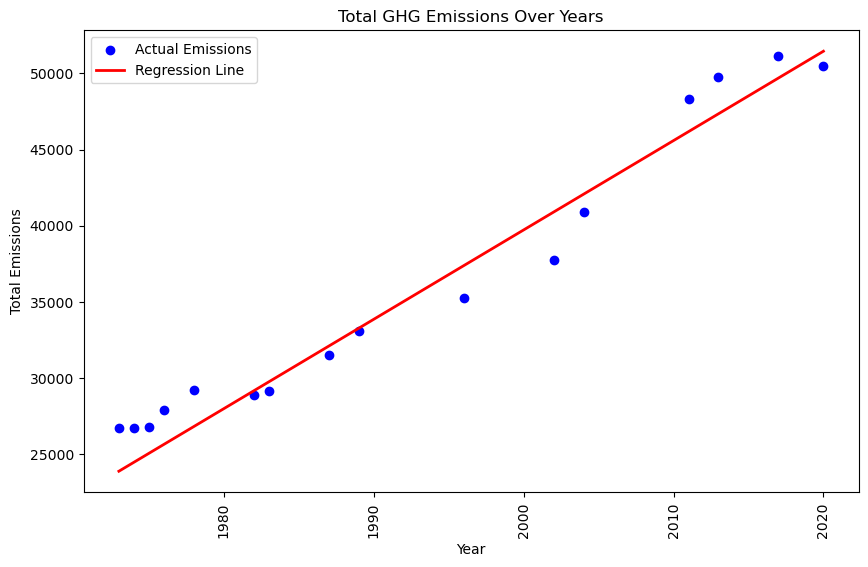

Mean Squared Error: 3554054.8697427427
R-squared: 0.9563448055526439


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Original Data/GHG_Emissions_World_Sector_Country.xlsx'
data_df = pd.read_excel(file_path)

# Display the first few rows and column names of the dataframe
print(data_df.head())
print(data_df.columns)
print(data_df.dtypes)

# Strip any extra whitespace from the column names and ensure they are strings
data_df.columns = data_df.columns.str.strip().astype(str)

# Check for missing values
missing_values = data_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
data_df_cleaned = data_df.dropna()

# List of years as strings based on actual columns in the dataset
years = [str(year) for year in range(1970, 2023)]

# Ensure the years columns exist
print("Columns in the dataframe:", data_df_cleaned.columns)

# Summing up GHG emissions for each year
total_emissions_per_year = data_df_cleaned[years].sum()

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_emissions_per_year.index, y=total_emissions_per_year.values)
plt.title('Total GHG Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
scatterplot_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/04 Analysis/Visualizations/scatterplot_total_emissions.png'
plt.savefig(scatterplot_path)
plt.show()

# Prepare the data for regression
X = np.array(total_emissions_per_year.index).astype(int).reshape(-1, 1)  # Independent variable: Year
y = total_emissions_per_year.values  # Dependent variable: Total Emissions

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y on the test set
y_pred = model.predict(X_test)

# Ensure X_test is sorted for plotting purposes
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Emissions')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.title('Total GHG Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend()
regression_line_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/04 Analysis/Visualizations/regression_line_total_emissions.png'
plt.savefig(regression_line_path)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


## Interpretation of Model Fit and Performance

The scatterplot of total GHG emissions over the years shows a clear upward trend, indicating that global GHG emissions have indeed increased significantly since 1970. This trend supports our hypothesis.

Model Performance Statistics
Mean Squared Error (MSE): 3,554,054.87
R-squared (R²) Score: 0.9563

The Mean Squared Error (MSE) is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a better fit, and in this context, an MSE of 3,554,054.87 suggests that while there are some deviations, the model's predictions are reasonably close to the actual values.

The R-squared (R²) score indicates the proportion of the variance in the dependent variable (total emissions) that is predictable from the independent variable (year). An R² score of 0.9563 means that 95.63% of the variance in total GHG emissions can be explained by the year. This high R² value suggests that the linear regression model fits the data very well.

In [13]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Year': X_test_sorted.flatten(),
    'Actual Emissions': y_test_sorted,
    'Predicted Emissions': y_pred_sorted
})

print(comparison_df)


    Year  Actual Emissions  Predicted Emissions
0   1973      26717.221437         23899.977431
1   1974      26725.975920         24486.343095
2   1975      26785.003705         25072.708758
3   1976      27936.717953         25659.074422
4   1978      29223.582977         26831.805749
5   1982      28918.956167         29177.268404
6   1983      29152.736389         29763.634067
7   1987      31523.468914         32109.096722
8   1989      33078.936558         33281.828049
9   1996      35240.895339         37386.387695
10  2002      37772.661997         40904.581676
11  2004      40939.125621         42077.313004
12  2011      48337.262465         46181.872649
13  2013      49797.445015         47354.603976
14  2017      51114.296455         49700.066631
15  2020      50496.330261         51459.163622


## Comparison of Predicted and Actual Values
The comparison of actual emissions with predicted emissions shows that while the model's predictions are generally close to the actual values, there are some deviations. The predicted values follow the same overall trend as the actual values, indicating that the model captures the general pattern of increasing emissions over time.

## Insights on Hypothesis

The hypothesis stated that global GHG emissions have increased significantly since 1970. The visual analysis of the scatterplot and the high R² score from the regression analysis strongly support this hypothesis. The clear upward trend in emissions over time indicates a significant increase in GHG emissions over the past few decades.

## Model Performance on the Test Set

The model performed very well on the test set, as evidenced by the high R² score. The regression line plotted against the test data shows that the model captures the overall trend accurately, although there are some deviations.

## Reflections on Possible Data Bias

While the model performed well, it is important to consider potential biases in the data:

Historical Changes: The data reflects historical emissions, which may be influenced by changes in industrial activity, environmental regulations, and economic factors over time.

Data Collection Methods: Variations in how emissions data were collected and reported over the years could introduce inconsistencies.

Global Coverage: The data may not equally represent all countries and regions, potentially biasing the results towards areas with more comprehensive reporting.